#### 순환 뉴런

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simple RNN
simple_rnn_model = keras.models.Sequential(keras.layers.SimpleRNN(units=1, input_shape=[None, 1]))

In [3]:
simple_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


📌 sequence의 길이가 3이므로, 3개의 결과가 출력

In [4]:
x = np.array([1.0, 2.0, 3.0]).reshape(1, -1, 1)
x.shape

(1, 3, 1)

In [5]:
RNN_layer1 = keras.layers.SimpleRNN(units=1, input_shape=[None, 1])
RNN_layer1(x)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.5828477]], dtype=float32)>

In [6]:
# return_sequences = True : 모든 스텝별로 계산된 sequence 출력
keras.layers.SimpleRNN(units=1, input_shape=[None, 1], return_sequences=True)(x)

<tf.Tensor: shape=(1, 3, 1), dtype=float32, numpy=
array([[[0.50106364],
        [0.5373249 ],
        [0.8057706 ]]], dtype=float32)>

In [7]:
# two-dimensional input
x2 = np.array([[1.0, 2.0, 3.0, 4.0],
[4.0, 3.0, 2.0, 1.0]]).reshape(1, -1, 2)

x2.shape

(1, 4, 2)

In [8]:
keras.layers.SimpleRNN(units=1, input_shape=[None, 1], return_sequences=True)(x2)

<tf.Tensor: shape=(1, 4, 1), dtype=float32, numpy=
array([[[-0.99476177],
        [-0.9999886 ],
        [-0.99999166],
        [-0.9717594 ]]], dtype=float32)>

In [9]:
# two one-dimensional input
x3 = np.array([[1.0, 2.0, 3.0, 4.0],
[4.0, 3.0, 2.0, 1.0]]).reshape(2, -1, 1)

x3.shape

(2, 4, 1)

In [10]:
keras.layers.SimpleRNN(units=1, input_shape=[None, 1], return_sequences=True)(x3)

<tf.Tensor: shape=(2, 4, 1), dtype=float32, numpy=
array([[[0.7265651 ],
        [0.98833877],
        [0.9989001 ],
        [0.99982935]],

       [[0.9987426 ],
        [0.99892265],
        [0.99321985],
        [0.9574728 ]]], dtype=float32)>

#### 여러 유닛을 가지는 RNN layer

In [11]:
simple_rnn_model2 = keras.models.Sequential(keras.layers.SimpleRNN(units=5, input_shape=[None, 1]))

In [12]:
simple_rnn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 5)                 35        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [13]:
simple_rnn_model3 = keras.models.Sequential(keras.layers.SimpleRNN(units=5, input_shape=[None, 3]))

In [14]:
simple_rnn_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 5)                 45        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


📌 3개의 입력 + 5개의 이전 스텝 출력 + 편향 ==> 9개의 parameter

📌 유닛이 총 5개 ==> 5 X 9 = 45개의 parameter

##### Deep RNN

In [15]:
# Layer들을 여러 개 쌓아 Deep RNN 만들기
model = keras.models.Sequential([
    keras.layers.SimpleRNN(30, return_sequences = True, input_shape=[None, 2]),
    keras.layers.SimpleRNN(15, return_sequences = True),
    keras.layers.SimpleRNN(1)
])

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, None, 30)          990       
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, None, 15)          690       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 1)                 17        
                                                                 
Total params: 1,697
Trainable params: 1,697
Non-trainable params: 0
_________________________________________________________________


📌990 = (입력 2개 + 편향 1개 + 30개의 이전 출력) * 30개의 유닛

📌690 = (입력 30개 + 편향 1개 + 15개의 이전 출력) * 15개의 유닛

📌17 = 입력 15개 + 편향 1개 + 1개의 이전 출력

In [17]:
# 첫번째 layer의 파라미터 수
(2 + 30 + 1) * 30

990

In [18]:
# 두번째 layer의 파라미터 수
(30 + 15 + 1) * 15

690

In [19]:
# 마지막 layer의 파라미터 수
15 + 1 + 1

17

##### 시계열 생성 예제

In [20]:
# 임의의 시계열을 생성하는 함수
# ... (ellipsis) : 여러 차원을 한꺼번에 선택
# np.newaxis : 차원 증가
# np.random.rand()

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [21]:
generate_time_series(batch_size=1, n_steps=5)

array([[[-0.40085143],
        [ 0.1285713 ],
        [ 0.22071995],
        [-0.39319924],
        [-0.1047867 ]]], dtype=float32)

In [22]:
generate_time_series(2, 5).shape

(2, 5, 1)

2 : batch_size, 5 : sequence, 1 : dimension

##### 마지막 값 예측하기

In [23]:
# 처음 50개의 step의 값들을 이용 --> 마지막 하나의 값을 예측
np.random.seed(42)

n_steps = 50
series = generate_time_series(batch_size = 10000, n_steps = n_steps + 1)

In [24]:
series.shape

(10000, 51, 1)

In [25]:
# X_train : X1, X2, ..., X50
# y_train : X51
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]

In [26]:
# y_train : t=51에서 관찰된 값 (7000개의 X51)
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [27]:
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]

In [28]:
X_valid.shape, y_valid.shape

((2000, 50, 1), (2000, 1))

In [29]:
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [30]:
X_test.shape, y_test.shape

((1000, 50, 1), (1000, 1))

In [31]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, '.-')
    if y is not None:
        plt.plot(n_steps, y, 'bx', markersize = 10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, 'ro')
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps+1, -1, 1])

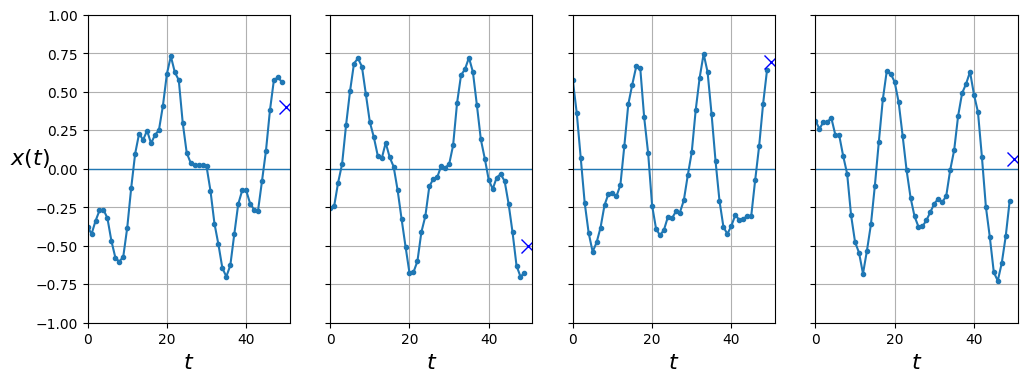

In [32]:
# sharey : 그래프의 축 공유
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(12, 4))
for col in range(4):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
    y_label=("$x(t)$" if col==0 else None))
plt.show()

📌 X : X51의 예상 위치

📌 앞에서 훈련시킨 후 시계열 데이터가 들어왔을 때 올바른 X를 찍을 수 있는가

In [33]:
y_pred = X_valid[:, -1] # 마지막 값
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

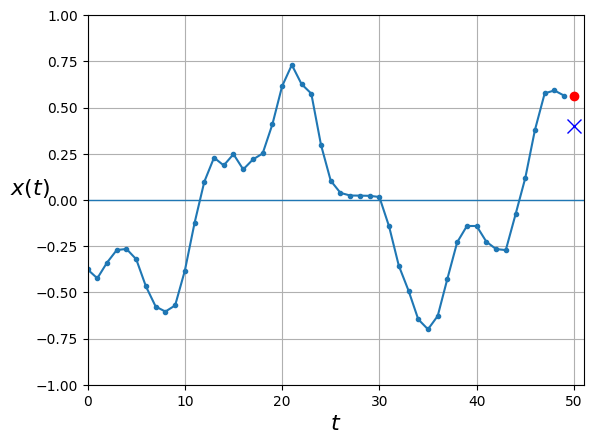

In [34]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

📌붉은 동그라미 : 마지막 값을 이용한 단순 예측값

📌X : 실제 값

In [35]:
X_train[:1]

array([[[ 0.4596948 ],
        [ 0.31486678],
        [ 0.12497123],
        [-0.1039134 ],
        [-0.33817387],
        [-0.53167135],
        [-0.65472883],
        [-0.6680997 ],
        [-0.6068115 ],
        [-0.50168324],
        [-0.27951923],
        [-0.15070675],
        [ 0.01001816],
        [ 0.11860766],
        [ 0.09566415],
        [ 0.1479297 ],
        [ 0.16850619],
        [ 0.19524719],
        [ 0.22094081],
        [ 0.38448656],
        [ 0.4021102 ],
        [ 0.5566975 ],
        [ 0.55000687],
        [ 0.47437248],
        [ 0.29733396],
        [ 0.13306592],
        [-0.1292547 ],
        [-0.36367297],
        [-0.49515054],
        [-0.65279794],
        [-0.6665792 ],
        [-0.5604573 ],
        [-0.50344354],
        [-0.28775147],
        [-0.12684062],
        [-0.0095053 ],
        [ 0.12024356],
        [ 0.18013756],
        [ 0.1559989 ],
        [ 0.1756968 ],
        [ 0.217454  ],
        [ 0.30272725],
        [ 0.38143268],
        [ 0

In [36]:
# 1차원 시계열
X_train.shape

(7000, 50, 1)

In [37]:
srnn_layer = keras.layers.SimpleRNN(units=1, input_shape = [None, 1])
srnn_layer(X_train[:1])     # y50 값 반환

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.52290374]], dtype=float32)>

In [38]:
# return_sequences = True : 모든 step에 대한 출력 결과 반환
keras.layers.SimpleRNN(units=1, input_shape=[None, 1], return_sequences=True)(X_train[:1])

<tf.Tensor: shape=(1, 50, 1), dtype=float32, numpy=
array([[[-0.5083263 ],
        [-0.71248806],
        [-0.69875103],
        [-0.5168687 ],
        [-0.10418013],
        [ 0.49604422],
        [ 0.86024964],
        [ 0.93218505],
        [ 0.9318186 ],
        [ 0.91270363],
        [ 0.8492622 ],
        [ 0.7751117 ],
        [ 0.64278036],
        [ 0.4606777 ],
        [ 0.33108097],
        [ 0.14959069],
        [-0.05579783],
        [-0.28567228],
        [-0.5042942 ],
        [-0.75004977],
        [-0.84554446],
        [-0.90944105],
        [-0.9186053 ],
        [-0.90459937],
        [-0.853014  ],
        [-0.7679252 ],
        [-0.5443629 ],
        [-0.10062292],
        [ 0.4645326 ],
        [ 0.851185  ],
        [ 0.9307397 ],
        [ 0.92375803],
        [ 0.9117108 ],
        [ 0.8517639 ],
        [ 0.7642734 ],
        [ 0.6503255 ],
        [ 0.46503916],
        [ 0.24060048],
        [ 0.05036046],
        [-0.16240226],
        [-0.40325254],
     

In [39]:
# 마지막 스텝 직후의 시계열 값을 예측하는 것이 목표
np.random.seed(42)
tf.random.set_seed(42)

# X51에 대한 예측, y50 값 출력
model = keras.models.Sequential([
    keras.layers.SimpleRNN(units=1, input_shape=[None, 1])
])

In [40]:
# 가장 간단한 형태의 RNN => 입력 1개 + 이전 타임 스텝의 출력 1개 + 편향 1개
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [41]:
optimizer = keras.optimizers.Adam(learning_rate = 0.005)

In [42]:
# y : 양적 변수 ==> loss function : "mse"
model.compile(loss='mse', optimizer = optimizer)

In [43]:
# batch_size = 32 (default)
history = model.fit(X_train, y_train, epochs=20,
validation_data = (X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 2s 5ms/step - loss: 0.0967 - val_loss: 0.0489
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0369 - val_loss: 0.0296
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0253 - val_loss: 0.0218
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0198 - val_loss: 0.0177
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0166 - val_loss: 0.0151
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 8/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0116 - val_loss: 0.0110

In [44]:
# validation set에 대한 MSE 측정 결과
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0109


0.010881561785936356

In [45]:
# Validation set에 대한 예측값
y_pred = model.predict(X_valid)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[ 0.51761144],
       [-0.603583  ],
       [ 0.6157377 ],
       ...,
       [-0.1806495 ],
       [-0.18601239],
       [ 0.50569546]], dtype=float32)

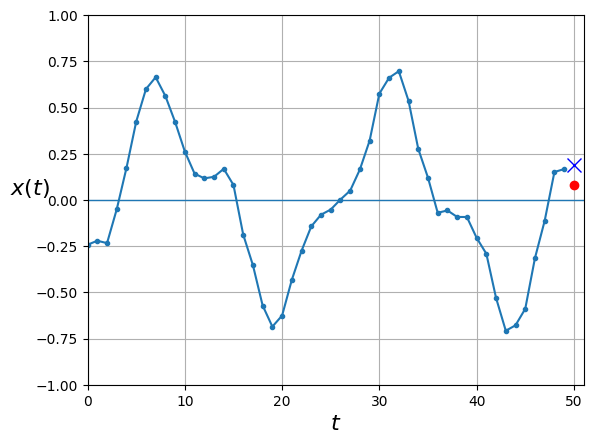

In [46]:
# 실제값(X)과 예측값(동그라미) 비교
plot_series(X_valid[4, :, 0], y_valid[4, 0], y_pred[4, 0])
plt.show()

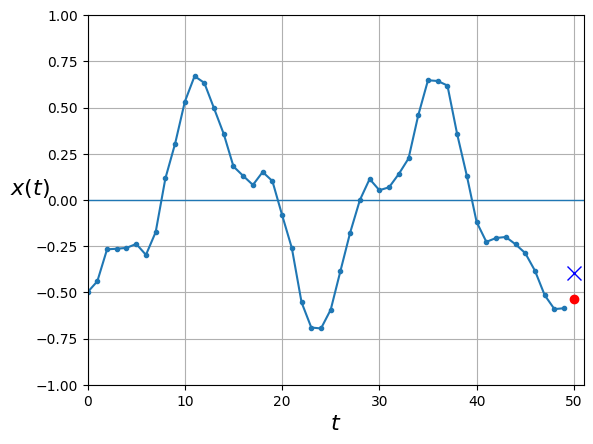

In [47]:
plot_series(X_valid[5, :, 0], y_valid[5, 0], y_pred[5, 0])
plt.show()

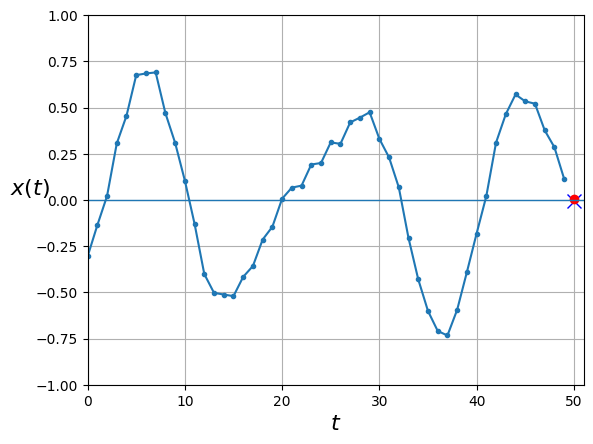

In [48]:
plot_series(X_valid[20, :, 0], y_valid[20, 0], y_pred[20, 0])
plt.show()

##### 심층 RNN

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(units=20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(units=20),
    keras.layers.Dense(1)
])

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_13 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 20)                820       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [51]:
# first layer's parameter
# (input + bias + previous y return) * units
(1 + 1 + 20) * 20

440

In [52]:
# second layer's parameter
# (input + bias + previous y return) * units
(20 + 1 + 20) * 20

820

In [53]:
# last layer's parameter
# input + bias
20 + 1

21

In [54]:
model.compile(optimizer='adam', loss='mse')

In [55]:
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 11ms/step - loss: 0.0232 - val_loss: 0.0052
Epoch 2/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 3/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 4/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 5/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 6/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 8/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 9/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 10/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0030 - val_lo

In [56]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 3ms/step - loss: 0.0026


0.002623623935505748

63/63 [==============================] - 0s 3ms/step


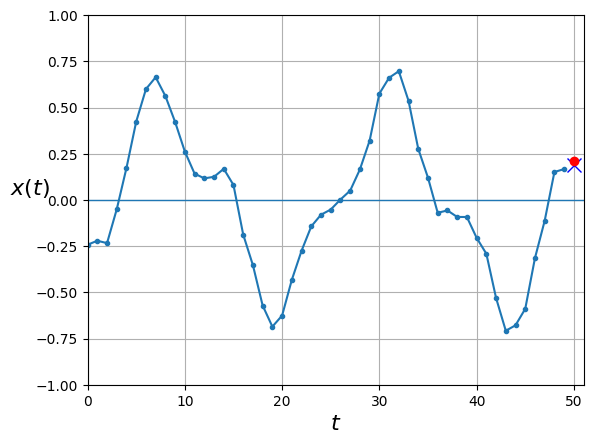

In [57]:
# X : 실제값, 붉은 원 : 예측값
y_pred = model.predict(X_valid)
plot_series(X_valid[4, :, 0], y_valid[4, 0], y_pred[4, 0])
plt.show()

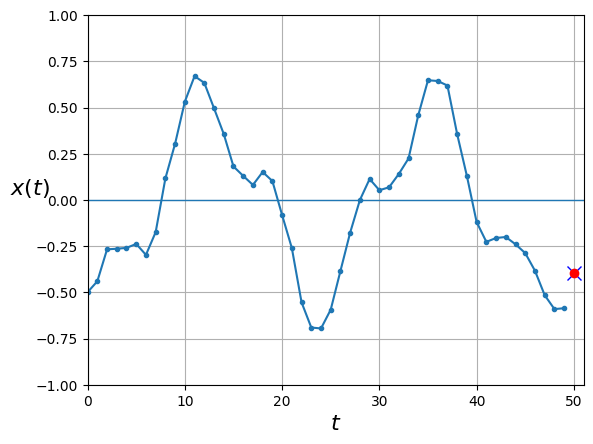

In [58]:
plot_series(X_valid[5, :, 0], y_valid[5, 0], y_pred[5, 0])
plt.show()

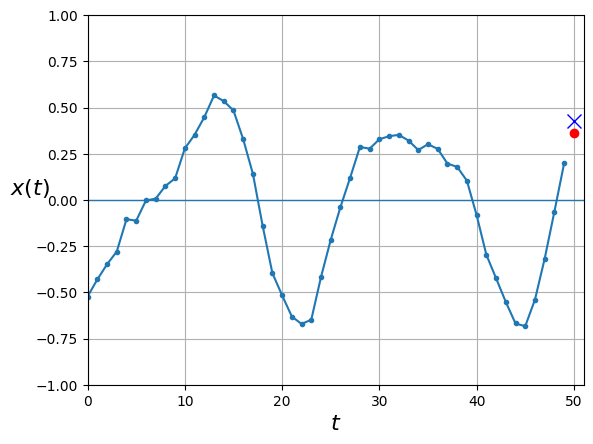

In [59]:
plot_series(X_valid[25, :, 0], y_valid[25, 0], y_pred[25, 0])
plt.show()

##### 여러 스텝에 대한 예측
- 이미 훈련한 모델을 사용 => 다음 값을 예측
- 단점 : 오차 누적

[ X1 - X50 ==> X51 예측<br>
X2 - X51 ==> X52 예측<br>
X3 - X52 ==> X53 예측<br>
:<br>
X10 - X59 ==> X60 예측 ]

In [60]:
np.random.seed(43)

series = generate_time_series(1, n_steps + 10)  # 10개의 미래 step에 대해 예측
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new

In [61]:
X.shape

(1, 50, 1)

In [62]:
Y_new.shape

(1, 10, 1)

In [63]:
for step_ahead in range(10):
    # (1, 1) ===> (1, 1, 1)
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :] # np.newaxis : 새로운 축 추가

    # 예측한 y값을 이전의 X들에 연결
    X = np.concatenate([X, y_pred_one], axis=1) # X를 계속 연장

1/1 [==============================] - 0s 15ms/step


In [64]:
# 10개의 미래 step에 대해 예측
# 50이후의 값
Y_pred = X[:, n_steps:]
Y_pred

array([[[ 5.9786546e-01],
        [ 6.2769604e-01],
        [ 5.8461940e-01],
        [ 4.4361150e-01],
        [ 2.5026149e-01],
        [-2.0576781e-04],
        [-2.2154389e-01],
        [-3.9917153e-01],
        [-4.9649712e-01],
        [-5.1475251e-01]]], dtype=float32)

In [65]:
Y_pred.shape

(1, 10, 1)

In [115]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], 'bx-', label='Actual')
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], 'ro-', label='Forecast', markersize=10)
    plt.axis([0, n_steps+ahead, -1, 1])
    plt.legend(fontsize=14)

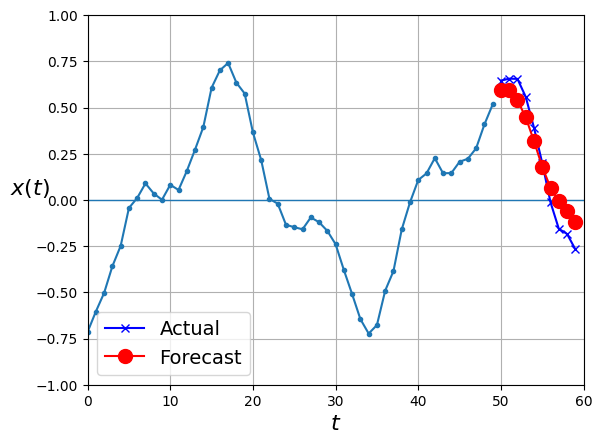

In [116]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

📌 오차가 누적되면 값이 많이 커짐 (X와 동그라미의 차이)

[ "마지막 타임 스텝"에서만 다음 값 10개를 한번에 예측 ]

- 시퀀스-투-벡터

- target을 다음 10개의 값으로 이루어진 벡터로 변환

In [102]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps+10)    # 60개 생성

X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [103]:
Y_train.shape

(7000, 10)

In [104]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)  # 10개를 한번에 예측 ==> 10개의 유닛을 가진 출력층 필요
])

In [105]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_19 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [106]:
# first layer's parameter
(1 + 1 + 20) * 20

440

In [107]:
# second layer's parameter
(20 + 1 + 20) * 20

820

In [108]:
# last layer's parameter
(20 + 1) * 10

210

In [109]:
model.compile(loss='mse', optimizer='adam')

In [110]:
history = model.fit(X_train, Y_train, epochs=20,
validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 3s 10ms/step - loss: 0.0669 - val_loss: 0.0317
Epoch 2/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0265 - val_loss: 0.0200
Epoch 3/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0183 - val_loss: 0.0160
Epoch 4/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0155 - val_loss: 0.0144
Epoch 5/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0139 - val_loss: 0.0118
Epoch 6/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0128 - val_loss: 0.0112
Epoch 7/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 8/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 9/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0111 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0110 - val_loss

In [111]:
# 새로운 시계열 생성
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]

In [112]:
Y_pred = model.predict(X_new)
Y_pred  # (1, 10)

1/1 [==============================] - 0s 177ms/step


array([[ 0.59747523,  0.59740144,  0.5398133 ,  0.4468127 ,  0.31821787,
         0.17894183,  0.06597456, -0.00696762, -0.06230178, -0.11950975]],
      dtype=float32)

In [113]:
# plot_multiple_forecasts 함수로 그리기 위해 차원 추가
Y_pred = Y_pred[..., np.newaxis]
Y_pred  # (1, 10, 1)

array([[[ 0.59747523],
        [ 0.59740144],
        [ 0.5398133 ],
        [ 0.4468127 ],
        [ 0.31821787],
        [ 0.17894183],
        [ 0.06597456],
        [-0.00696762],
        [-0.06230178],
        [-0.11950975]]], dtype=float32)

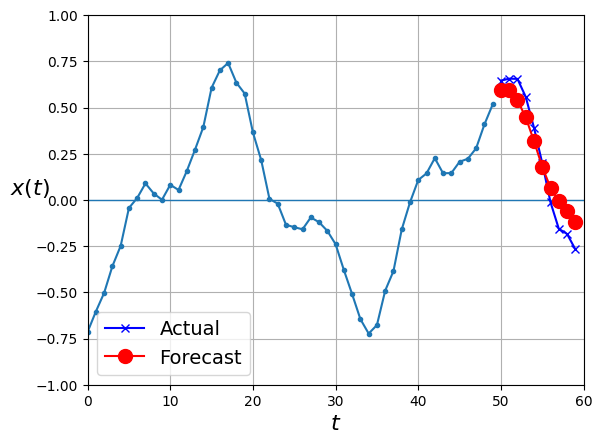

In [117]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

[ "모든 타임 스텝"에서 다음 10개의 값을 예측 ]

- 시퀀스-투-시퀀스

- 타입 스텝 0에서 타입 스텝 1에서 10까지의 예측이 담긴 벡터 출력

In [118]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]

In [119]:
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test =Y[9000:]

In [120]:
Y_train[0, 0, :]

array([ 0.33874455,  0.18980233,  0.00611999, -0.19590542, -0.38614848,
       -0.54409838, -0.62904716, -0.66339582, -0.65724516, -0.51447874])

In [121]:
X_train[0, 1:11]

array([[ 0.33874455],
       [ 0.18980233],
       [ 0.00611999],
       [-0.19590542],
       [-0.38614848],
       [-0.5440984 ],
       [-0.62904716],
       [-0.6633958 ],
       [-0.65724516],
       [-0.51447874]], dtype=float32)

In [122]:
Y_train[3, 21, :]

array([ 0.34871522,  0.3379415 ,  0.36283925,  0.33348137,  0.31685767,
        0.3044225 ,  0.17381966, -0.07805993, -0.25450805, -0.47299817])

In [123]:
X_train[3, 22:32]

array([[ 0.34871522],
       [ 0.3379415 ],
       [ 0.36283925],
       [ 0.33348137],
       [ 0.31685767],
       [ 0.3044225 ],
       [ 0.17381966],
       [-0.07805993],
       [-0.25450805],
       [-0.47299817]], dtype=float32)

In [125]:
X_train.shape, Y_train.shape

# Y_train.shape ==> (7000, 50, 10)

((7000, 50, 1), (7000, 50, 10))

In [126]:
# TimeDistributed 층 : 모든 타임 스텝에서 출력을 Dense 층에 적용
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [127]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_21 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, None, 20)          820       
                                                                 
 time_distributed (TimeDistr  (None, None, 10)         210       
 ibuted)                                                         
                                                                 
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [130]:
# training set 중 하나의 시계열
first_output = model.get_layer(index=0)(X_train[:1, :, :1])
first_output.shape

# ([1, 50, 20]) ==> ([data, time_step, units])

TensorShape([1, 50, 20])

In [132]:
second_output = model.layers[1](first_output)
second_output.shape

TensorShape([1, 50, 20])

In [133]:
third_output = model.layers[2](second_output)
third_output.shape

TensorShape([1, 50, 10])

📌 훈련 --> 모든 출력 필요

📌 예측, 평가 --> 마지막 타임 스텝의 출력만 이용

In [134]:
# X50만을 이용해 X51 ~ X60 예측
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [135]:
model.compile(loss='mse',
              optimizer = keras.optimizers.Adam(learning_rate=0.01),
              metrics=[last_time_step_mse])

In [136]:
# 50번의 MSE 구하기
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data = (X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 4s 14ms/step - loss: 0.0508 - last_time_step_mse: 0.0400 - val_loss: 0.0429 - val_last_time_step_mse: 0.0324
Epoch 2/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0395 - last_time_step_mse: 0.0283 - val_loss: 0.0367 - val_last_time_step_mse: 0.0266
Epoch 3/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0325 - last_time_step_mse: 0.0213 - val_loss: 0.0292 - val_last_time_step_mse: 0.0172
Epoch 4/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0302 - last_time_step_mse: 0.0191 - val_loss: 0.0283 - val_last_time_step_mse: 0.0164
Epoch 5/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0274 - last_time_step_mse: 0.0155 - val_loss: 0.0271 - val_last_time_step_mse: 0.0172
Epoch 6/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0253 - last_time_step_mse: 0.0128 - val_loss: 0.0244 - val_last_time_step_mse: 0.0115
Epoch 7/20
219/219 [==

In [137]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]

X_new.flatten(), Y_new.flatten()

# Y_new() : 실제 관찰된 값 10개

(array([-0.71430594, -0.60402304, -0.50313395, -0.35858592, -0.24881063,
        -0.04383381,  0.01058156,  0.08940701,  0.03474095,  0.00100053,
         0.08181838,  0.05386399,  0.15612572,  0.2726096 ,  0.39456058,
         0.60695225,  0.7012151 ,  0.7410105 ,  0.6343575 ,  0.575656  ,
         0.36496112,  0.21561034,  0.00555652, -0.02026231, -0.13460334,
        -0.14756192, -0.15892327, -0.09476995, -0.12051219, -0.16748159,
        -0.23957133, -0.37922844, -0.5098355 , -0.6450499 , -0.72317773,
        -0.6771738 , -0.4908803 , -0.38508183, -0.16000108, -0.01318712,
         0.10783868,  0.14367718,  0.22596198,  0.14425407,  0.14529224,
         0.2065604 ,  0.22278383,  0.2794281 ,  0.4081502 ,  0.51637864],
       dtype=float32),
 array([ 0.64557177,  0.6562027 ,  0.65506256,  0.5576619 ,  0.39075595,
         0.19883814, -0.0130802 , -0.15594868, -0.18422735, -0.2669426 ],
       dtype=float32))

In [138]:
Y_pred = model.predict(X_new)

1/1 [==============================] - 0s 160ms/step


In [139]:
Y_pred.shape

(1, 50, 10)

In [141]:
Y_pred[:, 1]

# X2 - X11에 대한 예측

array([[-0.45820573, -0.32468855, -0.16469496, -0.03531448,  0.06679425,
         0.13504742,  0.17828472,  0.20747592,  0.23562722,  0.2781325 ]],
      dtype=float32)

In [143]:
Y_pred[:, 2]

# X3 - X12에 대한 예측

array([[-0.31194177, -0.18665706, -0.08036216,  0.00681354,  0.06485868,
         0.10565608,  0.13888928,  0.18778293,  0.25544518,  0.33791605]],
      dtype=float32)

In [144]:
# 마지막 10개에 대한 예측 (X51 - X60)
Y_pred[:, -1]

array([[ 0.5803686 ,  0.5937276 ,  0.52189624,  0.41696313,  0.28238538,
         0.12781478, -0.01949495, -0.14032921, -0.22367737, -0.27406693]],
      dtype=float32)

In [145]:
# 마지막 10개의 실제값
Y_new

array([[[ 0.64557177],
        [ 0.6562027 ],
        [ 0.65506256],
        [ 0.5576619 ],
        [ 0.39075595],
        [ 0.19883814],
        [-0.0130802 ],
        [-0.15594868],
        [-0.18422735],
        [-0.2669426 ]]], dtype=float32)

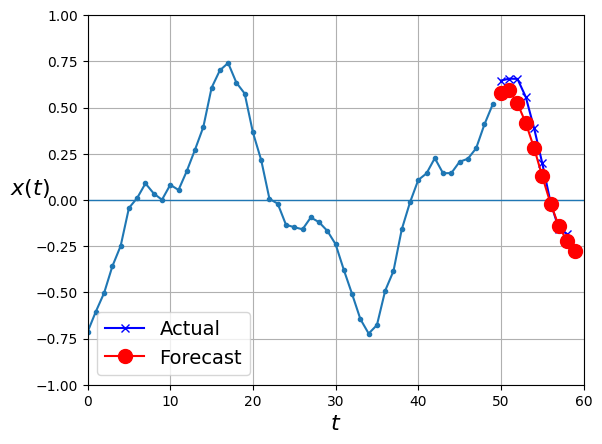

In [146]:
plot_multiple_forecasts(X_new, Y_new, Y_pred[:, -1][..., np.newaxis])
plt.show()